In [514]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_3563/3778547952.py:15: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")


# Data Exploration

In [515]:
general_information = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "generic_name",
    "quantity",
]

tags = [
    "pnns_groups_1",
    "pnns_groups_2",
    "packaging",
    "packaging_tags",
    "brands",
    "brands_tags",
    "categories",
    "categories_tags",
    "categories_fr",
    "origins",
    "origins_tags",
    "manufacturing_places",
    "manufacturing_places_tags",
    "labels",
    "labels_tags",
    "labels_fr",
    "emb_codes",
    "emb_codes_tags",
    "first_packaging_code_geo",
    "cities",
    "cities_tags",
    "states",
    "states_fr",
    "states_tags",
    "purchase_places",
    "stores",
    "countries",
    "countries_tags",
    "countries_fr",
]

ingredients = [
    "ingredients_text",
    "traces",
    "traces_fr",
    "traces_tags",
]

misc_data = [
    "serving_size",
    "no_nutriments",
    "additives_n",
    "additives",
    "additives_fr",
    "additives_tags",
    "allergens",
    "allergens_fr",
    "ingredients_from_palm_oil_n",
    "ingredients_from_palm_oil",
    "ingredients_from_palm_oil_tags",
    "ingredients_that_may_be_from_palm_oil_n",
    "ingredients_that_may_be_from_palm_oil",
    "ingredients_that_may_be_from_palm_oil_tags",
    "nutrition_grade_fr",
    "main_category",
    "main_category_fr",
    "image_url",
    "image_small_url",
]

nutrition_facts = [
    "energy_100g",
    "energy-from-fat_100g",
    "fat_100g",
    "saturated-fat_100g",
    "butyric-acid_100g",
    "caproic-acid_100g",
    "caprylic-acid_100g",
    "capric-acid_100g",
    "lauric-acid_100g",
    "myristic-acid_100g",
    "palmitic-acid_100g",
    "stearic-acid_100g",
    "arachidic-acid_100g",
    "behenic-acid_100g",
    "lignoceric-acid_100g",
    "cerotic-acid_100g",
    "montanic-acid_100g",
    "melissic-acid_100g",
    "monounsaturated-fat_100g",
    "polyunsaturated-fat_100g",
    "omega-3-fat_100g",
    "alpha-linolenic-acid_100g",
    "eicosapentaenoic-acid_100g",
    "docosahexaenoic-acid_100g",
    "omega-6-fat_100g",
    "linoleic-acid_100g",
    "arachidonic-acid_100g",
    "gamma-linolenic-acid_100g",
    "dihomo-gamma-linolenic-acid_100g",
    "omega-9-fat_100g",
    "oleic-acid_100g",
    "elaidic-acid_100g",
    "gondoic-acid_100g",
    "mead-acid_100g",
    "erucic-acid_100g",
    "nervonic-acid_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "sucrose_100g",
    "glucose_100g",
    "fructose_100g",
    "lactose_100g",
    "maltose_100g",
    "maltodextrins_100g",
    "starch_100g",
    "polyols_100g",
    "fiber_100g",
    "proteins_100g",
    "casein_100g",
    "serum-proteins_100g",
    "nucleotides_100g",
    "salt_100g",
    "sodium_100g",
    "alcohol_100g",
    "vitamin-a_100g",
    "beta-carotene_100g",
    "vitamin-d_100g",
    "vitamin-e_100g",
    "vitamin-k_100g",
    "vitamin-c_100g",
    "vitamin-b1_100g",
    "vitamin-b2_100g",
    "vitamin-pp_100g",
    "vitamin-b6_100g",
    "vitamin-b9_100g",
    "folates_100g",
    "vitamin-b12_100g",
    "biotin_100g",
    "pantothenic-acid_100g",
    "silica_100g",
    "bicarbonate_100g",
    "potassium_100g",
    "chloride_100g",
    "calcium_100g",
    "phosphorus_100g",
    "iron_100g",
    "magnesium_100g",
    "zinc_100g",
    "copper_100g",
    "manganese_100g",
    "fluoride_100g",
    "selenium_100g",
    "chromium_100g",
    "molybdenum_100g",
    "iodine_100g",
    "caffeine_100g",
    "taurine_100g",
    "ph_100g",
    "fruits-vegetables-nuts_100g",
    "collagen-meat-protein-ratio_100g",
    "cocoa_100g",
    "chlorophyl_100g",
    "carbon-footprint_100g",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "nutrition_grade_uk",
    "glycemic-index_100g",
    "water-hardness_100g",
]

data_sections = {
    "General Information": general_information,
    "Tags": tags,
    "Ingredients": ingredients,
    "Miscellaneous Data": misc_data,
    "Nutrition Facts": nutrition_facts,
}

In [516]:
display(raw_products.shape)

(320772, 162)

## Exploration by Section

### General Information

In [517]:
raw_products[general_information].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
288012,7610491926548,http://world-fr.openfoodfacts.org/produit/7610...,openfood-ch-import,1486496467,2017-02-07T19:41:07Z,1486496468,2017-02-07T19:41:08Z,NaN,NaN,NaN
153017,819407010549,http://world-fr.openfoodfacts.org/produit/0819...,usda-ndb-import,1489096850,2017-03-09T22:00:50Z,1489096850,2017-03-09T22:00:50Z,Chipotle Chicken Sausage With Red Beans & Brow...,NaN,NaN
57286,44700024119,http://world-fr.openfoodfacts.org/produit/0044...,usda-ndb-import,1489070134,2017-03-09T14:35:34Z,1489070134,2017-03-09T14:35:34Z,Extra Cheesy Pizza,NaN,NaN
125703,688267146398,http://world-fr.openfoodfacts.org/produit/0688...,usda-ndb-import,1489061281,2017-03-09T12:08:01Z,1489061282,2017-03-09T12:08:02Z,"Greek Nonfat Yogurt, Black Cherry",NaN,NaN
317816,9000300127972,http://world-fr.openfoodfacts.org/produit/9000...,date-limite-app,1491123085,2017-04-02T08:51:25Z,1491123085,2017-04-02T08:51:25Z,Aufwickeln Duft gross,NaN,NaN


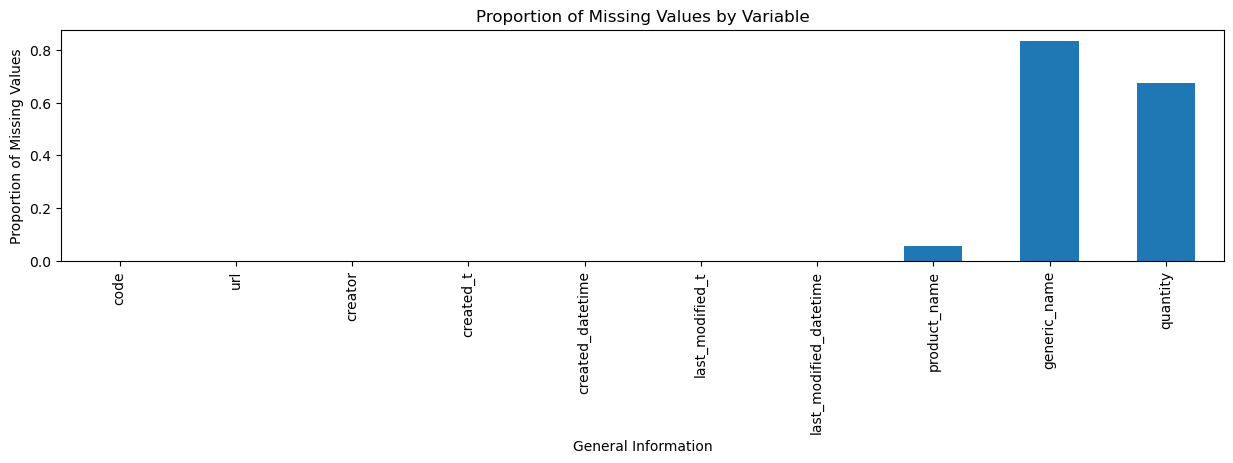

In [518]:
def plot_missing_data(df, section_name):
    plt.figure(figsize=[15, 3])
    df.isna().mean().plot(kind="bar")
    plt.title("Proportion of Missing Values by Variable")
    plt.xlabel(section_name)
    plt.ylabel("Proportion of Missing Values")
    plt.show()


plot_missing_data(raw_products[general_information], "General Information")

### Tags

In [519]:
raw_products[tags].sample(5)

,pnns_groups_1,pnns_groups_2,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,...,cities,cities_tags,states,states_fr,states_tags,purchase_places,stores,countries,countries_tags,countries_fr
141223,NaN,NaN,NaN,NaN,"Rocky Mountain Chocolate Factory, Rocky Mount...","rocky-mountain-chocolate-factory,rocky-mountai...",NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
142403,NaN,NaN,NaN,NaN,Maple Leaf Cheese Monroe,maple-leaf-cheese-monroe,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
215963,Salty snacks,Nuts,Sachet plastique,sachet-plastique,Leader Price,leader-price,"Cacahuètes grillées,cacahuètes salées","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,...,NaN,charvieu-chavagneux-isere-france,"en:to-be-checked, en:complete, en:nutrition-fa...","A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","Gap,France",Leader Price,France,en:france,France
45709,NaN,NaN,NaN,NaN,Goya Foods Inc.,goya-foods-inc,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
9178,NaN,NaN,NaN,NaN,Kingston Marketing Co,kingston-marketing-co,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis


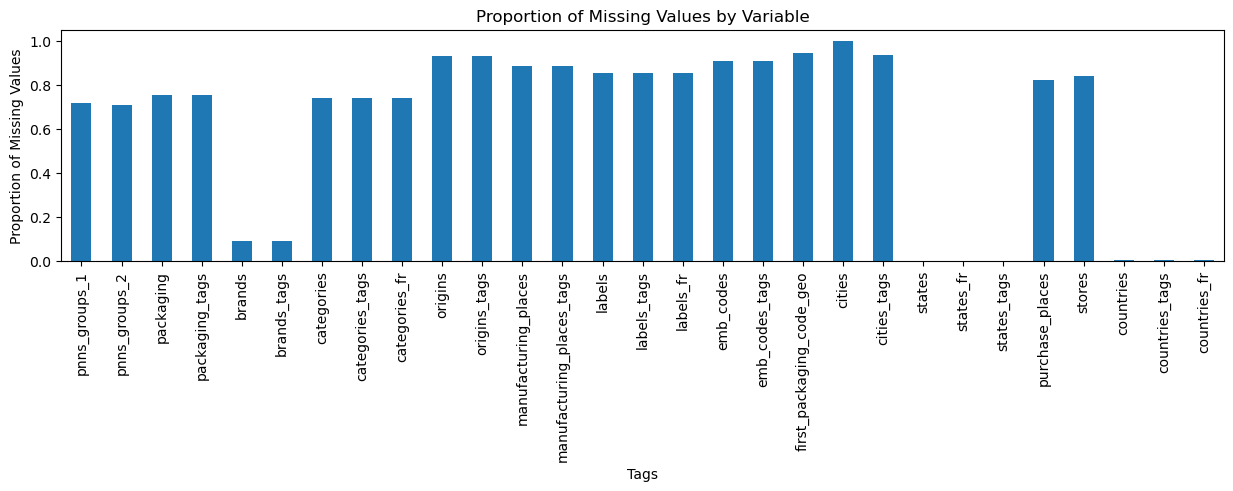

In [520]:
plot_missing_data(raw_products[tags], "Tags")

### Ingredients

In [521]:
raw_products[ingredients].sample(5)

,ingredients_text,traces,traces_fr,traces_tags
139987,"Enriched flour (wheat flour, niacin, reduced i...",NaN,NaN,NaN
314201,NaN,NaN,NaN,NaN
259011,NaN,NaN,NaN,NaN
260019,"Tofu* 76% (agua, habas de soja*, agentes cuaja...",NaN,NaN,NaN
17629,"Carbonated water, natural flavor.",NaN,NaN,NaN


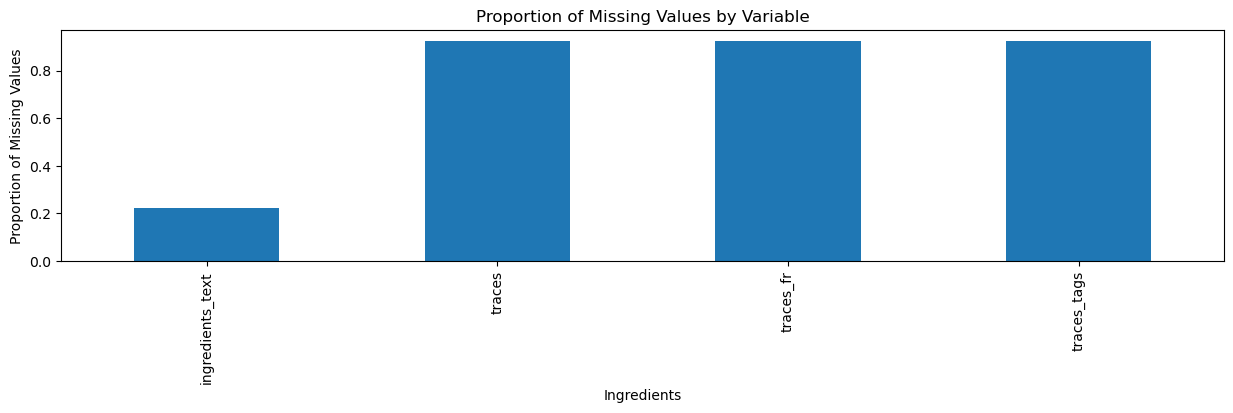

In [522]:
plot_missing_data(raw_products[ingredients], "Ingredients")

### Miscellaneous Data

In [523]:
raw_products[misc_data].sample(5)

,serving_size,no_nutriments,additives_n,additives,additives_fr,additives_tags,allergens,allergens_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,main_category,main_category_fr,image_url,image_small_url
266365,25g,NaN,0.0,[ erdnusse-90 -> xx:erdnusse-90 ] [ palmfet...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,e,en:spreads,Produits à tartiner,NaN,NaN
304209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/80...,http://fr.openfoodfacts.org/images/products/80...
298003,55 g,NaN,0.0,[ lait-entier-46 -> fr:lait-entier-46 ] [ l...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d,NaN,NaN,NaN,NaN
283895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/64...,http://fr.openfoodfacts.org/images/products/64...
44325,245 g (1 cup),NaN,1.0,[ water -> en:water ] [ lentils -> en:lenti...,E508 - Chlorure de potassium,en:e508,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,a,NaN,NaN,NaN,NaN


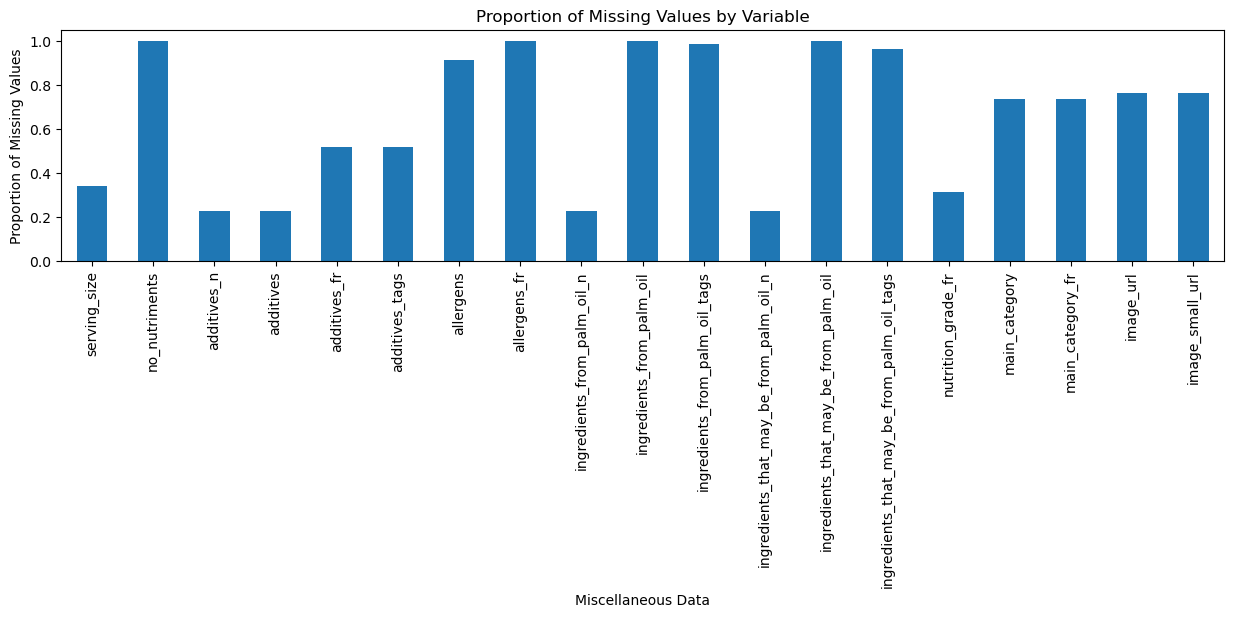

In [524]:
plot_missing_data(raw_products[misc_data], "Miscellaneous Data")

### Nutrition Facts

In [525]:
raw_products[nutrition_facts].sample(5)

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,...,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_uk,glycemic-index_100g,water-hardness_100g
188003,539.0,NaN,6.20,2.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.0,-4.0,NaN,NaN,NaN
111404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169650,1674.0,NaN,8.57,7.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN,NaN,NaN
179900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130952,1745.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN,NaN,NaN


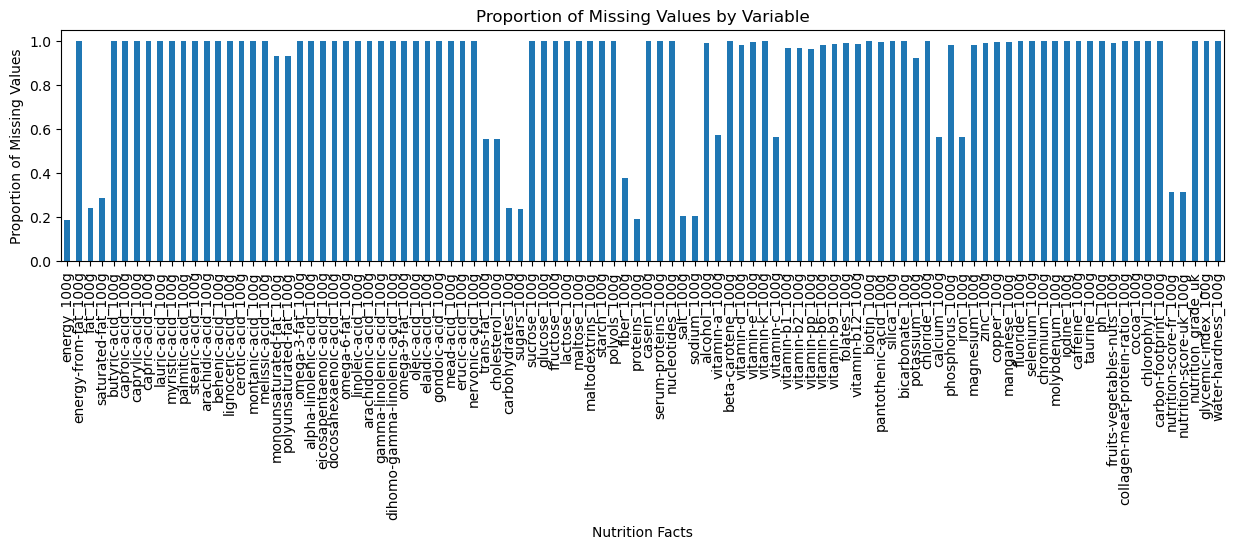

In [526]:
plot_missing_data(raw_products[nutrition_facts], "Nutrition Facts")

## Feature Selection 

The previous graphs show that there is a lot of missing data in each section, with many features containing more than 50% of null values. 

To start the cleaning process, we will set the cutoff at 50% to have a smaller data set. 

---

In [527]:
products = raw_products.loc[:, raw_products.isna().mean() < 0.5]

We can also remove the variables with duplicated information along with those that don't carry useful information:

In [528]:
products.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [529]:
products = products.drop(
    columns=[
        "creator",
        "created_t",
        "url",
        "last_modified_datetime",
        "created_datetime",
        "brands",
        "ingredients_that_may_be_from_palm_oil_n",
        "last_modified_t",
        "brands_tags",
        "countries_tags",
        "countries",
        "countries_fr",
        "states_tags",
        "additives",
        "states",
        "states_fr",
        "nutrition-score-uk_100g",
        "serving_size",
        "ingredients_text",
        "ingredients_from_palm_oil_n",
        "additives_n",
    ]
)

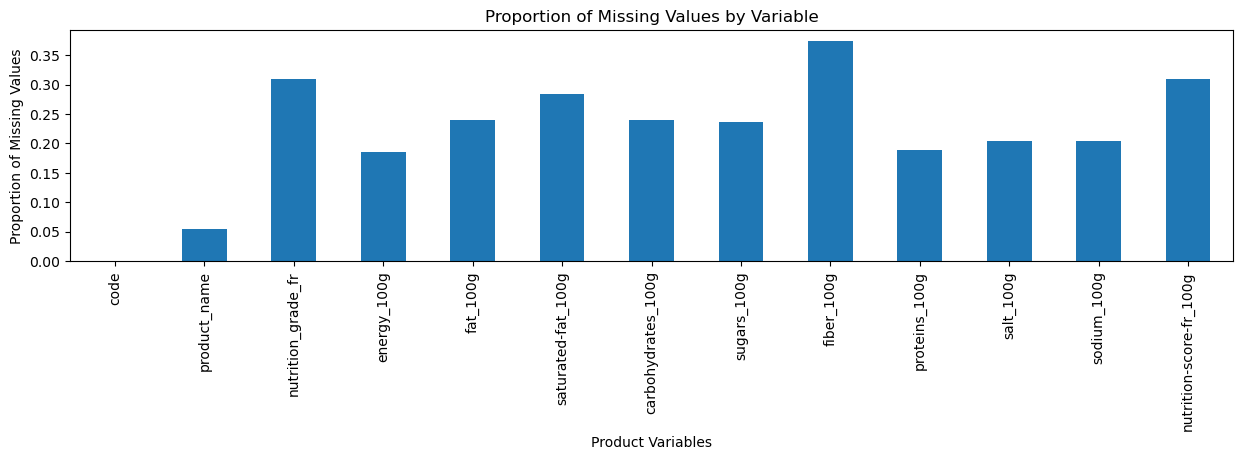

In [530]:
plot_missing_data(products, "Product Variables")

Check for duplicated entries: 

In [531]:
products.loc[products.duplicated(subset="code")]

,code,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
481,16117,Colossal Olives With Jalapeno Peppers,NaN,347.0,8.33,NaN,0.00,NaN,NaN,0.00,3.38582,1.333000,NaN
519,24600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233,Super chicken spinach & quinoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001,Bramley Apple Crumble,d,1192.0,NaN,7.40,NaN,21.60,2.2,3.20,0.23000,0.090551,12.0
1337,9800800056,Hazelnut Spread + Breadsticks,e,2171.0,26.92,9.62,65.38,44.23,3.8,7.69,0.63500,0.250000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280571,54491472,Coca-Cola,e,180.0,0.00,0.00,10.60,10.60,0.0,0.00,0.00000,0.000000,14.0
280572,54491496,Diet coke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281938,58449410003,Natures Path organic frosted berry toaster pas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300376,78742087108,Juice Cocktail Blended With Another Juice From...,NaN,192.0,0.00,NaN,11.67,11.67,NaN,0.00,0.05334,0.021000,NaN


In [532]:
products = products.loc[~products.duplicated(subset="code")]

We can remove entries that contain less than 20% data aside from general information:

In [533]:
nutrition_info = products.iloc[:, 3:].columns

products_to_remove = products.loc[products[nutrition_info].isna().mean(axis=1) > 0.8]

len(products_to_remove) / len(products) * 100

18.408552920886105

In [534]:
products = products.drop(products_to_remove.index)

In [535]:
products.shape

(261614, 13)

# Data Cleaning

Check the column types to see whether there is erroneous data:

In [536]:
products.dtypes

code                        object
product_name                object
nutrition_grade_fr          object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

The types are coherent with the nature of the feature

---

## Outliers

In [537]:
products.set_index("code", inplace=True)
products.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,2.606910e+05,243386.000000,229485.000000,243494.000000,244817.000000,200817.000000,259814.000000,255414.000000,255373.000000,220957.000000
mean,1.142165e+03,12.705761,5.129718,32.074492,15.992789,2.861833,7.076689,2.028636,0.798802,9.173432
std,6.452274e+03,17.568809,8.013402,29.733526,22.321326,12.869511,8.409427,128.293543,50.513321,9.055755
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


The min and max values of nutrition information variables suggest that there are some outliers. The rest of the variables however seem to have coherent data.

---


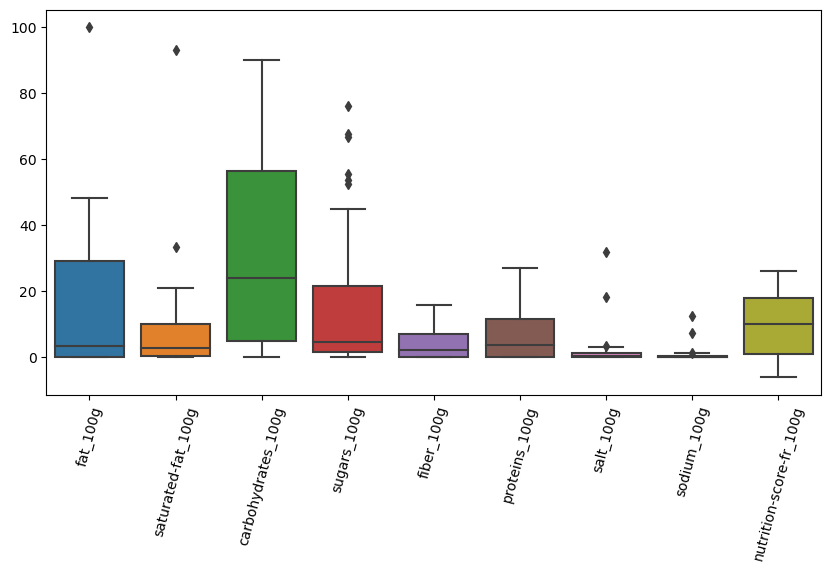

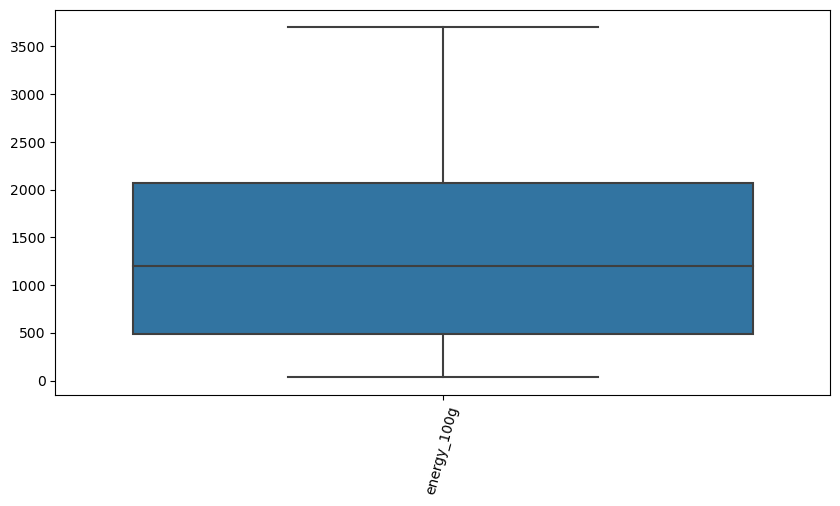

In [538]:
sample_outliers = products.sample(50).index


def map_outliers(df):
    plt.figure(figsize=[10, 5])
    sns.boxplot(df)
    plt.xticks(rotation=75)
    plt.show()


map_outliers(products.loc[sample_outliers, products.columns != "energy_100g"])
map_outliers(products.loc[sample_outliers, products.columns == "energy_100g"])

### Testing IQR method

In [539]:
products.isna().mean().mean()

0.07832850433590455

In [540]:
def remove_outliers(df):
    Q1 = np.nanpercentile(df, 25)
    Q3 = np.nanpercentile(df, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df


df = products.loc[:, ~products.columns.isin(["product_name", "nutrition_grade_fr"])]
products_without_outliers = df.apply(remove_outliers, axis=0)
products_without_outliers.isna().mean().mean()

0.11601022881038477

The IQR method removes 10% of data, which seems way too much. 
In addition, the product nutrition values are not really comparable using such method, therefore a lot of values would be wrongly considered outliers.

We can try applying this method to a subgroup of products that are more likely to have similar value range:

In [541]:
products = products.merge(
    raw_products[["pnns_groups_1", "pnns_groups_2", "code"]],
    left_index=True,
    right_on="code",
)

In [542]:
products["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Fish Meat Eggs', 'Beverages', 'Fat and sauces',
       'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes',
       'salty-snacks'], dtype=object)

In [543]:
mapping = {
    "vegetable|fruit": "Fruits and vegetables",
    "Sugary": "Sugary snacks",
    "sauces": "Fat and sauces",
    "Salty": "Salty snacks",
    "dairy|milk": "Milk and dairy products",
    "Composite": "Composite foods",
    "Fish|Meat|Eggs": "Fish Meat Eggs",
    "cereals|potatoes": "Cereals and potatoes",
    "Beverage": "Beverages",
}

products.loc[
    products["pnns_groups_1"].str.contains("unknown", case=False, na=False),
    "pnns_groups_1",
] = np.nan

for pattern, replacement in mapping.items():
    products.loc[
        products["pnns_groups_1"].str.contains(
            pattern, case=False, regex=True, na=False
        ),
        "pnns_groups_1",
    ] = replacement

unique_groups = products["pnns_groups_1"].unique()
print(unique_groups)

[nan 'Fruits and vegetables' 'Sugary snacks' 'Composite foods'
 'Fish Meat Eggs' 'Beverages' 'Fat and sauces' 'Cereals and potatoes'
 'Milk and dairy products' 'Salty snacks']


In [544]:
def get_pnns_groups(group=None):
    groups = {
        "dairy_products": "Milk and dairy products",
        "fruits_veggies": "Fruits and vegetables",
        "sugary_snacks": "Sugary snacks",
        "composite_foods": "Composite foods",
        "fish_meat_eggs": "Fish Meat Eggs",
        "beverages": "Beverages",
        "fat_sauces": "Fat and sauces",
        "cereals_potatoes": "Cereals and potatoes",
        "salty_snacks": "Salty snacks",
    }

    if group:
        return products.loc[products["pnns_groups_1"] == groups[group]]
    else:
        return {
            name: products.loc[products["pnns_groups_1"] == group]
            for name, group in groups.items()
        }


pnns_groups_1 = get_pnns_groups()

In [545]:
products["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'Soups', 'Legumes',
       'Cereals', 'Fruits', 'Milk and yogurt', 'Fats',
       'Non-sugared beverages', 'Cheese', 'Chocolate products',
       'Sandwich', 'Bread', 'Nuts', 'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'vegetables', 'pastries', 'Dairy desserts',
       'Alcoholic beverages', 'Fruit nectars', 'fruits',
       'Salty and fatty products', 'Tripe dishes', 'cereals', 'legumes',
       'nuts'], dtype=object)

In [546]:
products.loc[
    products["pnns_groups_2"].str.contains("unknown", case=False, na=False),
    "pnns_groups_2",
] = np.nan
products.loc[products["pnns_groups_2"].notna(), "pnns_groups_2"] = products.loc[
    products["pnns_groups_2"].notna(), "pnns_groups_2"
].str.capitalize()

products["pnns_groups_2"].unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Pizza pies and quiche',
       'Meat', 'Sweets', 'Sweetened beverages', 'Dressings and sauces',
       'One-dish meals', 'Soups', 'Legumes', 'Cereals', 'Fruits',
       'Milk and yogurt', 'Fats', 'Non-sugared beverages', 'Cheese',
       'Chocolate products', 'Sandwich', 'Bread', 'Nuts',
       'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Pastries', 'Dairy desserts', 'Alcoholic beverages',
       'Fruit nectars', 'Salty and fatty products', 'Tripe dishes'],
      dtype=object)

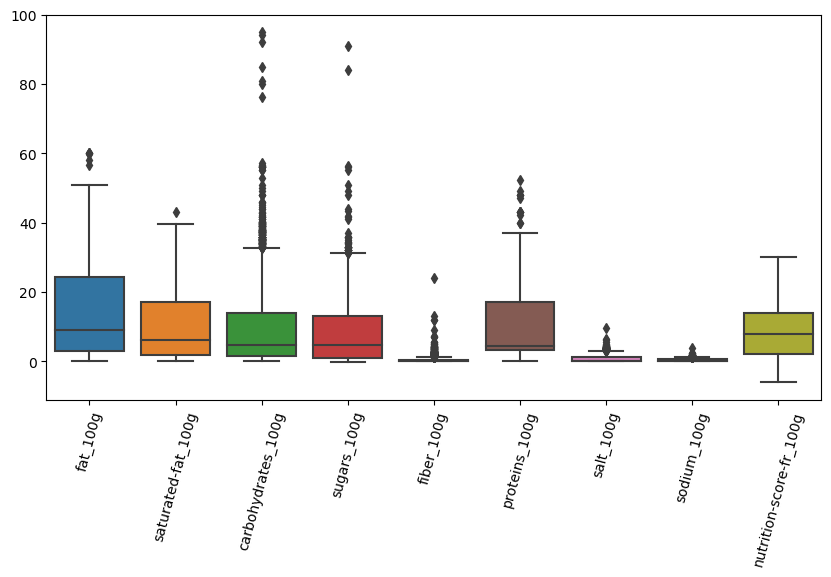

In [547]:
map_outliers(
    get_pnns_groups("dairy_products").loc[
        :, get_pnns_groups("dairy_products").columns != "energy_100g"
    ]
)

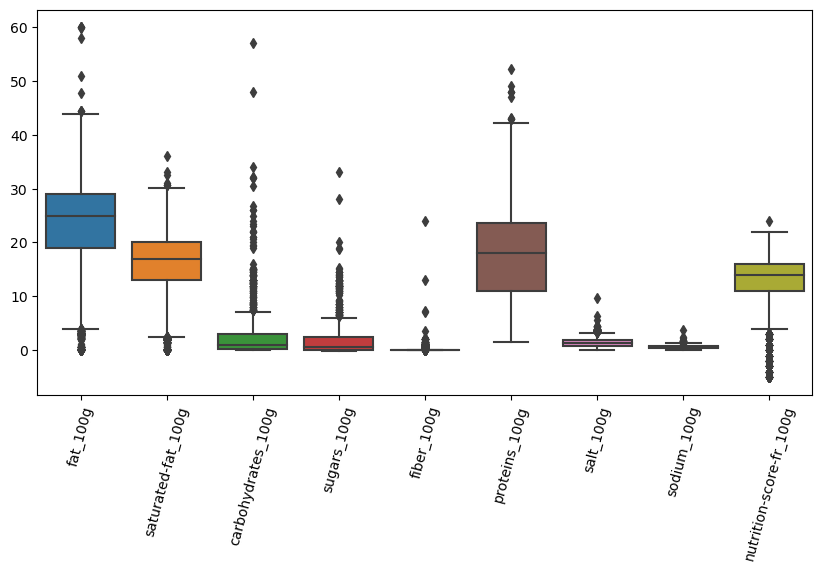

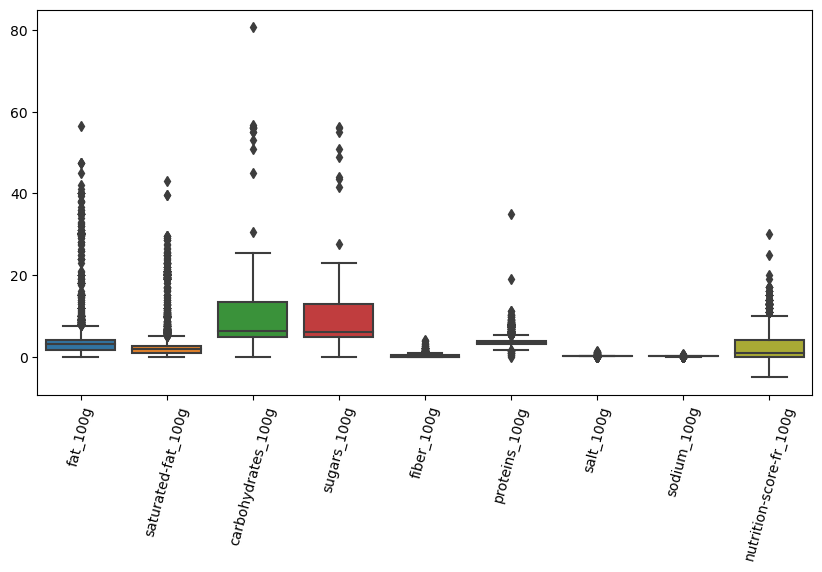

In [548]:
cheeses = products.loc[products["pnns_groups_2"] == "Cheese"]
milk_yogurts = products.loc[products["pnns_groups_2"] == "Milk and yogurt"]

map_outliers(cheeses.loc[:, cheeses.columns != "energy_100g"])
map_outliers(milk_yogurts.loc[:, milk_yogurts.columns != "energy_100g"])

There seems to be too many outliers identified with the IQR method even when products are grouped by pnns groups. 

We will therefore try a more business oriented approach to handling outliers

---

### Removing nutritional information outliers

Identifying outliers by the non null values outside of the 0-100 range for nutrition information:

In [549]:
nutrition_facts = [
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
]


def count_outliers(df=products):
    print(
        len(
            np.where(
                ((df[nutrition_facts] < 0) | (df[nutrition_facts] > 100))
                & df[nutrition_facts].notna()
            )[0]
        )
    )


count_outliers()

246


In [550]:
products[nutrition_facts] = np.where(
    ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
    & products[nutrition_facts].notna(),
    np.NAN,
    products[nutrition_facts],
)

count_outliers()

0


We can also remove all products whose carbs, fats and proteins amount to more than 100g:

In [551]:
erroneous_nutrition_facts = products.loc[
    products["carbohydrates_100g"] + products["fat_100g"] + products["proteins_100g"]
    > 101
]
erroneous_nutrition_facts

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
74,Organic Whole Brown Rice Flour,NaN,1891.0,3.23,NaN,96.77,NaN,6.4,12.90,NaN,NaN,NaN,NaN,NaN,33572
94,Unsalted Dry Roasted Almonds,NaN,2791.0,56.67,5.00,20.00,6.67,13.3,26.67,NaN,NaN,NaN,NaN,NaN,34784
129,Organic Rolled Rye Flakes,NaN,1674.0,2.00,NaN,84.00,NaN,16.0,16.00,NaN,NaN,NaN,NaN,NaN,38706
134,Organic Arboria Rice,NaN,1490.0,2.22,NaN,95.56,NaN,2.2,13.33,NaN,NaN,NaN,NaN,NaN,39208
220,Chocolate Scone,e,2912.0,39.29,23.21,80.36,46.43,3.6,5.36,0.63500,0.250,25.0,NaN,NaN,2046231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317225,Broccoli Chips,c,1987.0,20.00,5.00,90.00,30.00,15.0,5.00,0.00000,0.000,10.0,NaN,NaN,8855897000129
317226,Cherry Tomato Chips,d,1883.0,20.00,5.00,90.00,40.00,15.0,5.00,0.00000,0.000,12.0,NaN,NaN,8855897000136
317453,Milk Rusk,d,1971.0,12.50,7.00,78.00,23.00,3.0,11.00,1.16840,0.460,17.0,NaN,NaN,8901063136465
317701,Dates,a,1569.0,6.25,1.25,67.50,15.00,10.0,30.00,0.00000,0.000,-2.0,NaN,NaN,896245070353


In [552]:
products = products.drop(erroneous_nutrition_facts.index)
products.shape

(260461, 15)

### Removing energy feature outliers

For the energy feature, we can identify all products with energy levels that are superior to the usual maximum range for 100g worth of food, which would be about 3770kJ:

In [553]:
products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
698,"Bunge, Clear Liquid Soybean Frying Oil",NaN,3887.0,100.0,14.29,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,78684962026
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.0,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8274333381
3786,All-Vegetable Shortening,NaN,3837.0,100.0,25.00,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110846242
3810,All Vegetable Shortening,NaN,3837.0,100.0,29.17,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110847478
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.0,NaN,0.0,3.302,1.3,NaN,NaN,NaN,11150090834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316771,Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991839
316772,100% Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991914
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.8,NaN,3.8,0.000,0.0,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.000,0.0,20.0,NaN,NaN,9310804500189


We can replace the energy value for all products that contain 100g of fat to 3770:

In [554]:
products.loc[products["fat_100g"] == 100, "energy_100g"] = 3770

products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.00,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,8274333381
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.00,NaN,0.0,3.30200,1.300000,NaN,NaN,NaN,11150090834
15660,Tamalito Candy,e,5439.0,0.0,0.0,90.0,80.00,0.0,0.0,0.40640,0.160000,21.0,NaN,NaN,19962333026
20070,Bread Mix,e,10757.0,0.0,0.0,NaN,14.29,0.0,0.0,5.62356,2.214000,23.0,NaN,NaN,23545202883
27849,100% Natural Non-Stick Canola Cooking Spray Oil,NaN,6975.0,0.0,0.0,0.0,NaN,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,32251079443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313506,"Nusco, Chocolate Spread, Chocolate",e,231199.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,0.004000,25.0,NaN,NaN,8710573641501
313852,Cornetto Mini X8 Fruit,e,5644.0,NaN,13.0,NaN,24.00,0.0,3.7,0.12000,0.047244,25.0,NaN,NaN,8711200595631
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.80,NaN,3.8,0.00000,0.000000,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.0,NaN,82.00,0.0,0.0,0.00000,0.000000,20.0,NaN,NaN,9310804500189


For the remaining energy outliers we can recalculate the value based on fats, carbs and proteins:

In [555]:
def calculate_energy(row):
    fat = row["fat_100g"] if not np.isnan(row["fat_100g"]) else 0
    carbohydrates = (
        row["carbohydrates_100g"] if not np.isnan(row["carbohydrates_100g"]) else 0
    )
    proteins = row["proteins_100g"] if not np.isnan(row["proteins_100g"]) else 0
    return (fat * 37) + (carbohydrates * 17) + (proteins * 17)


products.loc[products["energy_100g"] > 3770, "energy_100g"] = products.loc[
    products["energy_100g"] > 3770
].apply(calculate_energy, axis=1)

products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code


## Missing Data

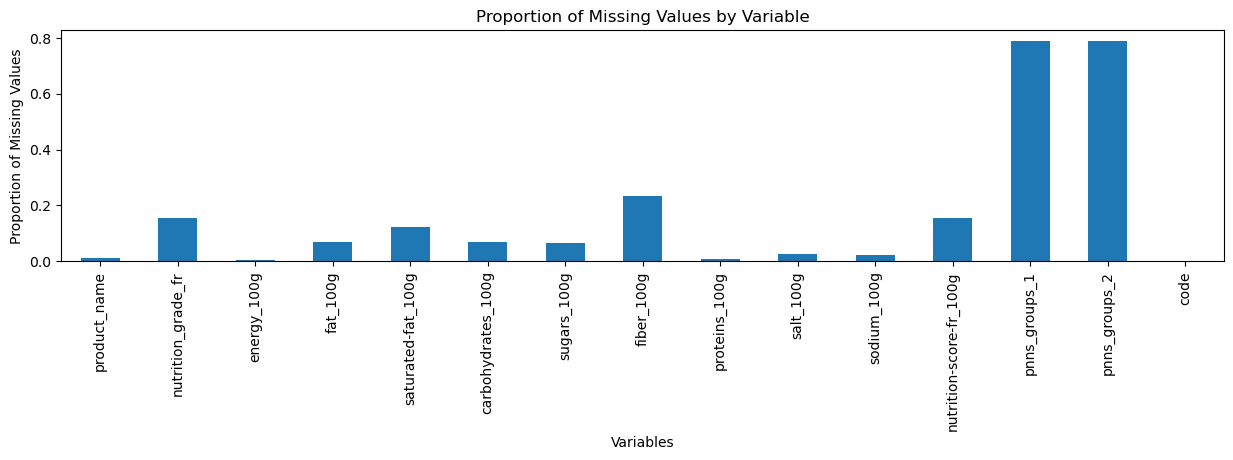

In [556]:
plot_missing_data(products, "Variables")

### Removing products with little data

We will drop all products with more than 60% of missing nutrition information as they contain too little data to base our suggestions on:

In [557]:
products_with_missing_data = products.loc[
    products[nutrition_facts].isna().mean(axis=1) > 0.6
]
products_with_missing_data.shape

(4694, 15)

In [558]:
products = products.drop(products_with_missing_data.index)

We will drop all products that contain only 0s and null values: 

In [559]:
nutrition_facts.append("energy_100g")
numeric_values = nutrition_facts.copy()
numeric_values.append("nutrition-score-fr_100g")

In [560]:
products_with_empty_data = products[
    np.all((products[numeric_values] == 0) | np.isnan(products[numeric_values]), axis=1)
]
products = products.drop(products_with_empty_data.index)

In [561]:
products.isna().mean().mean()

0.15807634257680647

In [562]:
products.shape

(252214, 15)

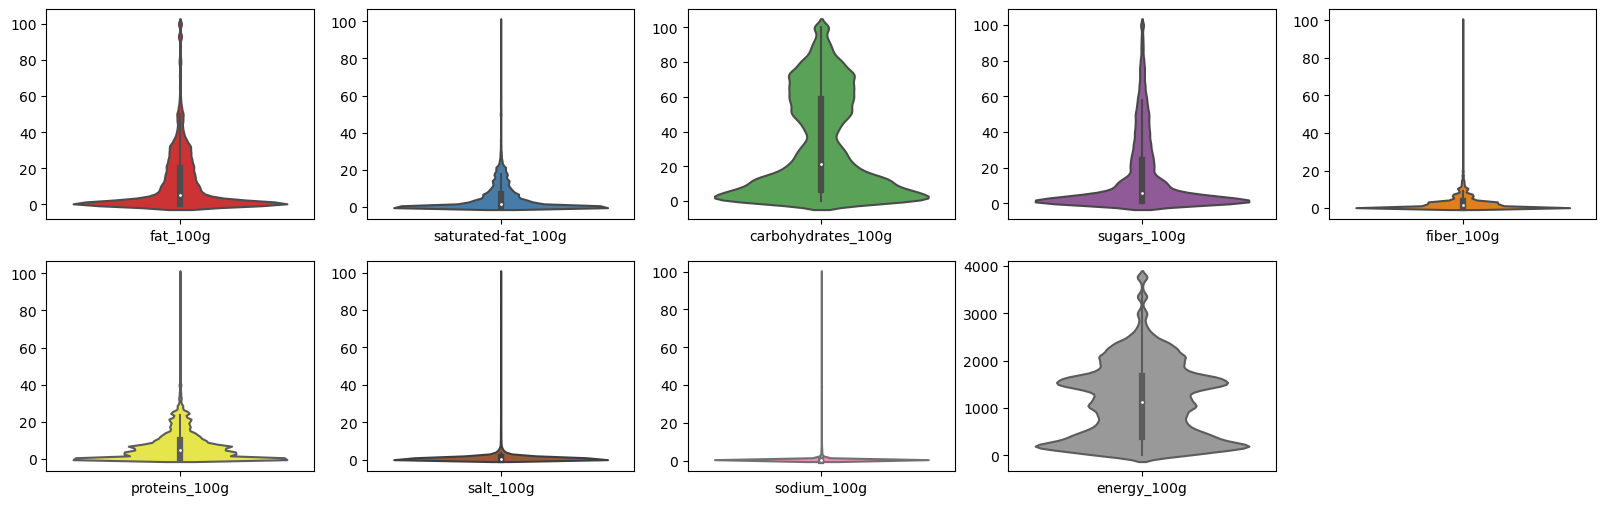

In [563]:
def plot_nutri_violin(df, feature=None):
    if feature:
        plt.figure(figsize=[3, 3])
        sns.violinplot(df[[feature]])
        plt.show()
    else:
        color_palette = sns.color_palette("Set1", len(nutrition_facts))
        plt.figure(figsize=(20, 6))
        for i, feature in enumerate(nutrition_facts):
            plt.subplot(2, 5, i + 1)
            sns.violinplot(df[[feature]], palette=[color_palette[i]])
        plt.show()


plot_nutri_violin(products)

### Calculating missing energy values

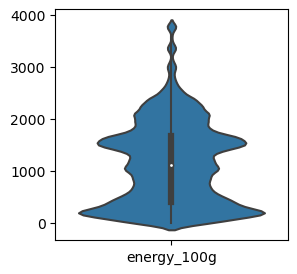

In [564]:
products.loc[products["energy_100g"].isna(), "energy_100g"] = products.loc[
    products["energy_100g"].isna()
].apply(calculate_energy, axis=1)

plot_nutri_violin(products, "energy_100g")

### Filling in values with 0

Fiber is mostly found in plant-based products, therefore all other products fiber value can be set to 0 if the value is NaN:

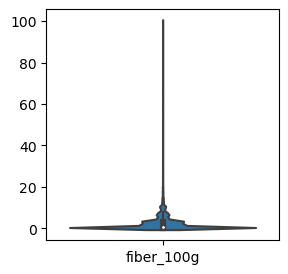

In [565]:
products.loc[
    ~(products["pnns_groups_1"].isin(["Fruits and vegetables", "Cereals and potatoes"]))
    & (products["fiber_100g"].isna()),
    "fiber_100g",
] = 0
plot_nutri_violin(products, "fiber_100g")

In [566]:
products["fiber_100g"].isna().mean()

0.007382619521517441

### Testing IterativeImputer with correlated features

To determine whether we can use the IterativeImputer method to fill in missing nutrition fact values, we will first identify whether there are significant correlations between features:

#### Correlation matrix

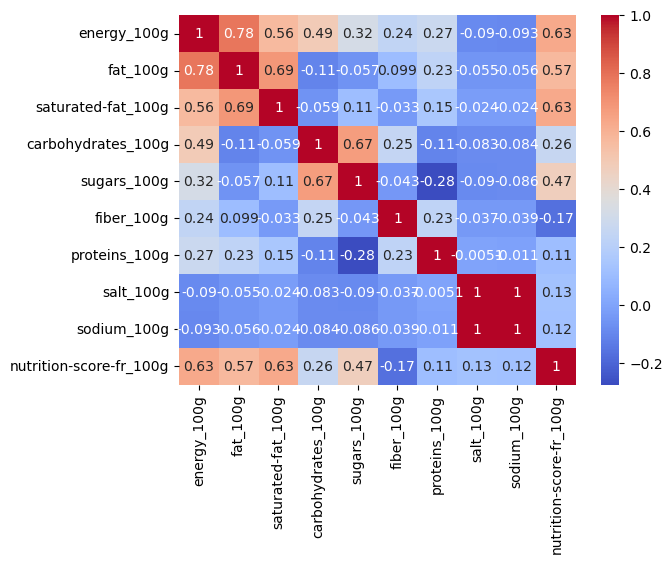

In [567]:
sns.heatmap(products.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()

The most interesting relationships are between saturated fats and the nutrition score and between energy and nutri score, as in both cases, a 0.6 suggests that the higher the amount of saturated fats or energy, the higher the nutri score. 

#### Correlations by food groups 

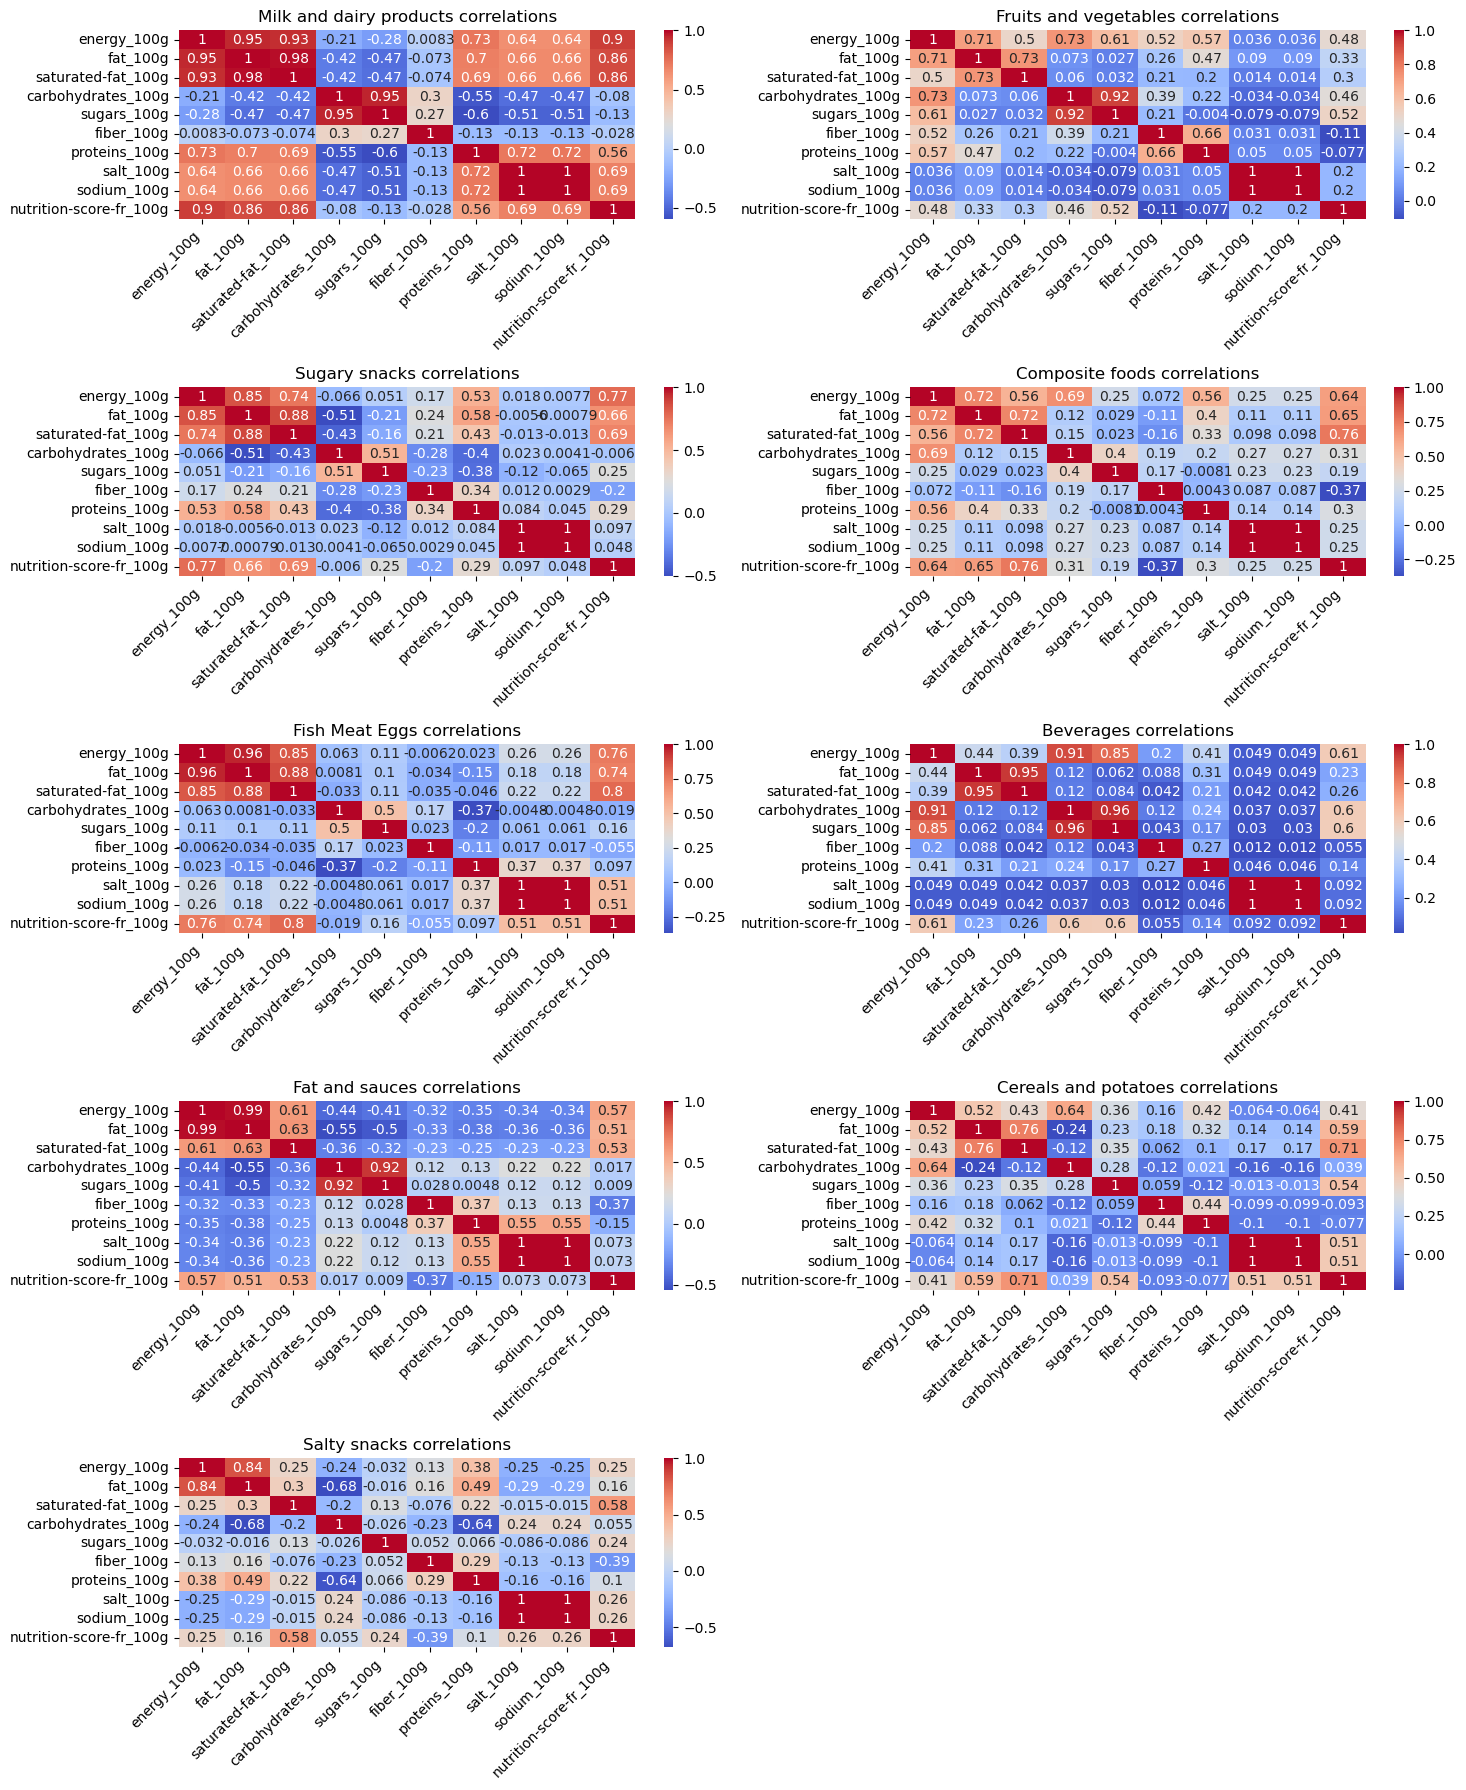

In [568]:
plt.figure(figsize=(15, 18))
for i, (group_name, group_df) in enumerate(get_pnns_groups().items()):
    i += 1
    ax = plt.subplot(5, 2, i)
    correlation_matrix = group_df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, ax=ax)
    ax.set_title(group_df.iloc[0]["pnns_groups_1"] + " correlations")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Food groups have an impact on correlations, which suggests that null values cannot be filled in using the same method over the entire data set without taking food groups into consideration

---

Since there is an overall high correlation between saturated fat, fat, sugars, carbs and energy, we will apply the IterativeImputer to these features

In [569]:
subset_columns = [
    "fat_100g",
    "energy_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
]
iterative_imputer_data = products.copy()

In [570]:
iterative_imputer = IterativeImputer(missing_values=np.nan, min_value=0, max_value=100)
iterative_imputer.fit(iterative_imputer_data[subset_columns])

IterativeImputer(max_value=100, min_value=0)

In [571]:
iterative_imputer_data[subset_columns] = iterative_imputer.transform(
    iterative_imputer_data[subset_columns]
)

In [572]:
def imputation_comparison(before, after):
    df = pd.concat(
        [
            before.assign(status="before_imputation"),
            after.assign(status="after_imputation"),
        ],
        axis=0,
    )

    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(nutrition_facts):
        ax = plt.subplot(2, 4, i + 1)
        melted_df = pd.melt(
            df, id_vars=["status"], value_vars=[feature], var_name="nutrition_fact"
        )
        sns.kdeplot(
            data=melted_df,
            x="value",
            hue="status",
            fill=True,
            alpha=0.5,
            linewidth=0,
        )
        ax.set_title(feature)
    plt.tight_layout()
    plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

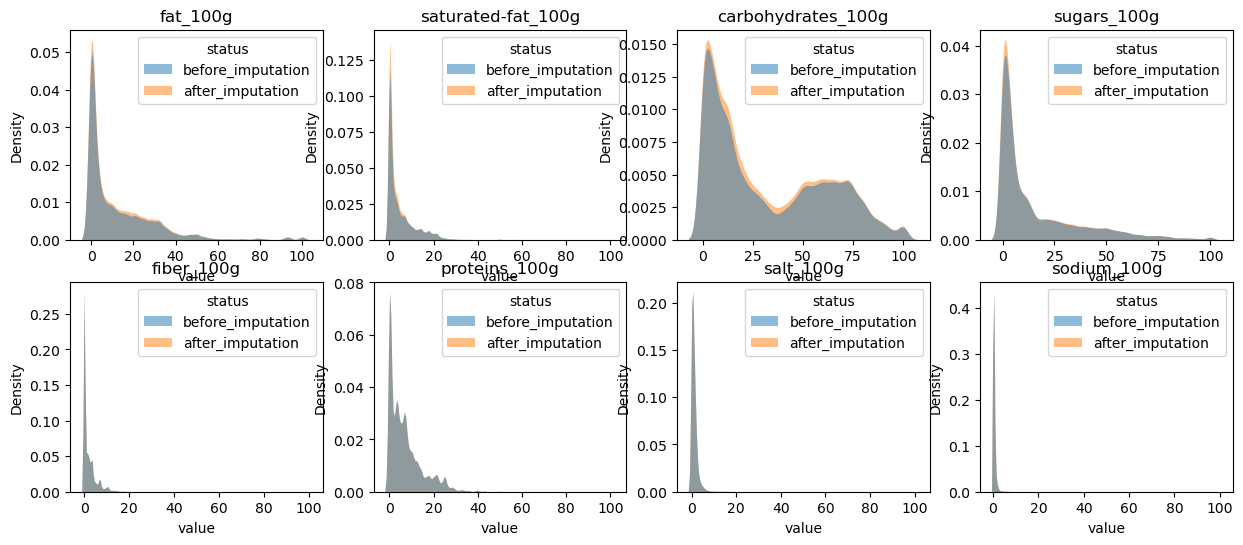

In [573]:
imputation_comparison(products, iterative_imputer_data)

In [ ]:
products = iterative_imputer_data

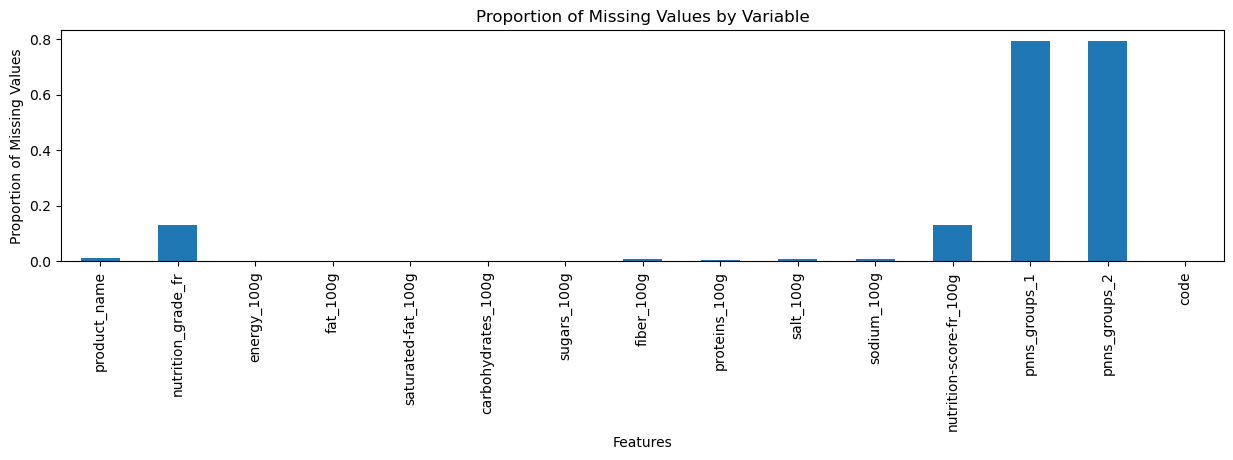

In [ ]:
plot_missing_data(products, "Features")

### Testing SimpleImputer

In [ ]:
dairy_products_imputed = get_pnns_groups("dairy_products")

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(dairy_products_imputed[nutrition_facts])

SimpleImputer(strategy='median')

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_3563/812711530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dairy_products_imputed[nutrition_facts] = imputer.transform(


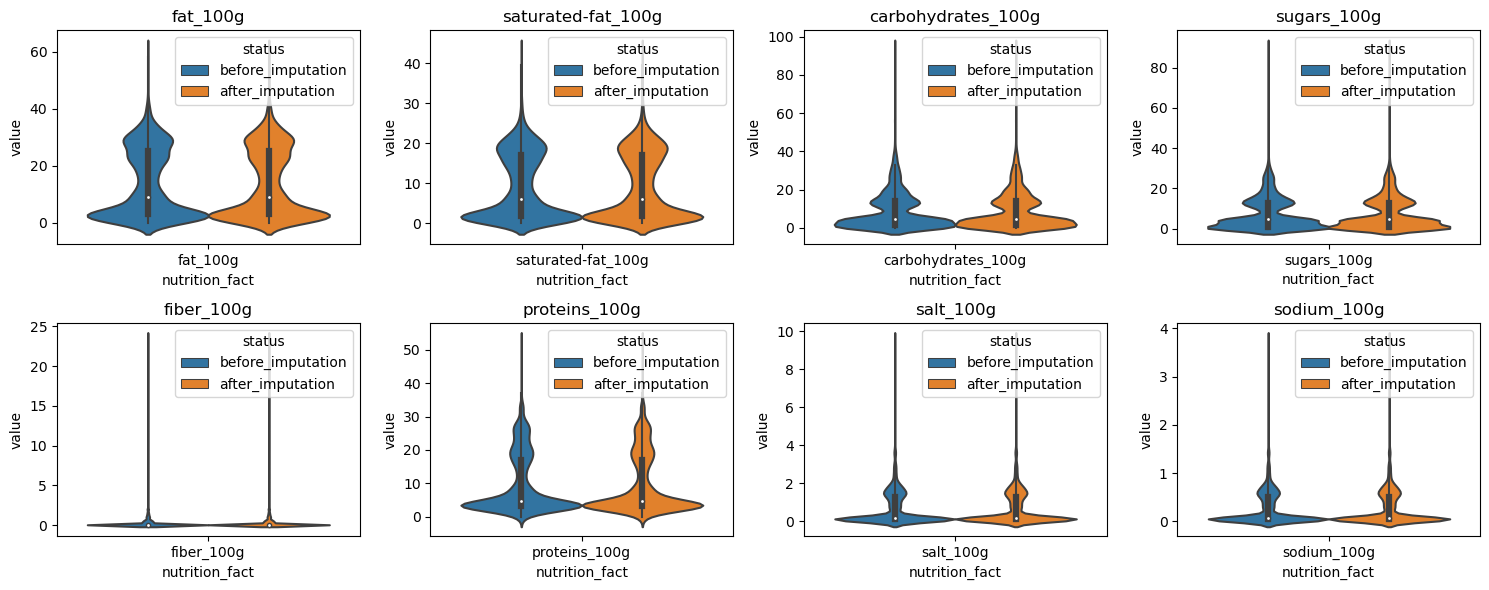

In [ ]:
dairy_products_imputed[nutrition_facts] = imputer.transform(
    dairy_products_imputed[nutrition_facts]
)

imputation_comparison(get_pnns_groups("dairy_products"), dairy_products_imputed)

In [ ]:
median_imputed_data = products.copy()

In [ ]:
for i, group in get_pnns_groups().items():
    imputed_data = group.copy()
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputer.fit(group[nutrition_facts])
    imputed_data[nutrition_facts] = imputer.transform(group[nutrition_facts])
    median_imputed_data.loc[imputed_data.index] = imputed_data

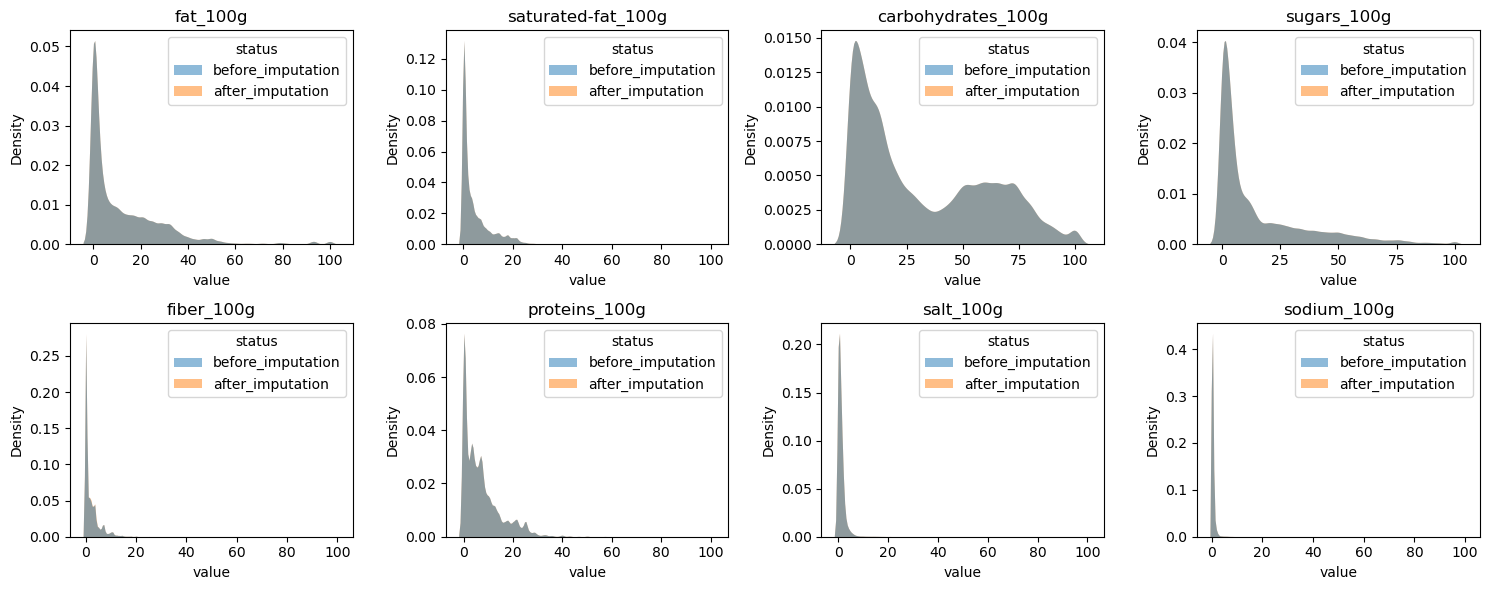

In [ ]:
imputation_comparison(products, median_imputed_data)

### Testing KNN

In [ ]:
def test_knn(df, train_subset, target, plot=False):
    train = df.dropna(axis=0, how="any", subset=numeric_values)
    xtrain, xtest, ytrain, ytest = train_test_split(
        train[train_subset], train[target], train_size=0.8
    )
    scaler = StandardScaler()
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)

    errors = []
    for k in range(2, 15):
        knn = neighbors.KNeighborsClassifier(k)
        errors.append(100 * (1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    if plot:
        plt.plot(range(2, 15), errors, "o-")
        plt.show()
    else:
        display(
            df["pnns_groups_1"].iloc[0] + str(train.shape) + ": " + str(np.mean(errors))
        )


for i, group in get_pnns_groups().items():
    test_knn(group, nutrition_facts, "nutrition-score-fr_100g")

'Milk and dairy products(6548, 15): 33.15325895478567'

'Fruits and vegetables(3193, 15): 44.37221620320212'

'Sugary snacks(9553, 15): 52.203840115928024'

'Composite foods(5430, 15): 71.68154129480097'

'Fish Meat Eggs(5141, 15): 47.89564177319279'

'Beverages(4953, 15): 38.76426298222464'

'Fat and sauces(3487, 15): 50.78245536698258'

'Cereals and potatoes(5549, 15): 47.699237699237706'

'Salty snacks(2261, 15): 64.64595007641364'

The KNN method yields very poor results when attempting to predict the nutrition score based on all other numeric values 

---

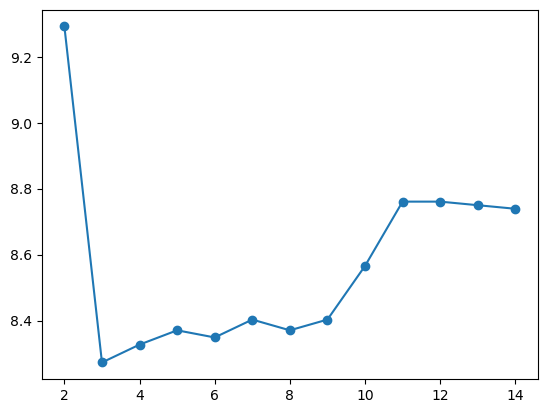

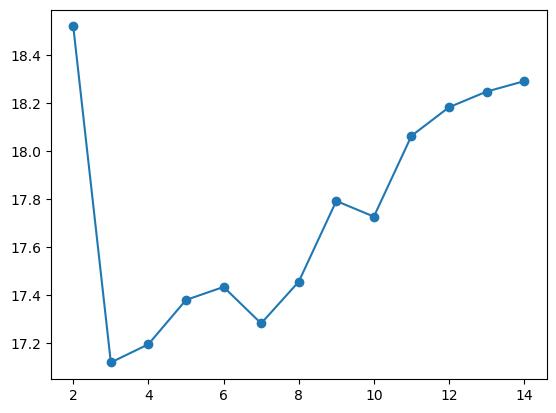

In [ ]:
pnns_groups = products.dropna(
    axis=0, how="any", subset=["pnns_groups_2", "pnns_groups_1"]
)
test_knn(pnns_groups, numeric_values, "pnns_groups_1", True)
test_knn(pnns_groups, numeric_values, "pnns_groups_2", True)

In [ ]:
train = pnns_groups.dropna(axis=0, how="any", subset=numeric_values)
xtrain, xtest, ytrain, ytest = train_test_split(
    train[numeric_values], train["pnns_groups_1"], train_size=0.8
)

knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

predicted = knn.predict(xtest)

misclassified_indices = ytest[ytest != predicted].index

comparison_df = pd.DataFrame(
    {"Original": ytest, "Predicted": predicted}, index=ytest.index
)
misclassified_rows = comparison_df.loc[
    comparison_df["Original"] != comparison_df["Predicted"]
]
misclassified_rows

,Original,Predicted
203132,Composite foods,Cereals and potatoes
251376,Sugary snacks,Cereals and potatoes
272317,Beverages,Fat and sauces
310133,Composite foods,Beverages
122885,Fruits and vegetables,Sugary snacks
...,...,...
177949,Fat and sauces,Composite foods
176872,Composite foods,Fish Meat Eggs
212105,Fish Meat Eggs,Composite foods
192407,Milk and dairy products,Fish Meat Eggs


In [ ]:
pnns_groups.loc[215033]

product_name               Biscuits petit déjeuner Miel, céréales et pépi...
nutrition_grade_fr                                                         c
energy_100g                                                           1914.0
fat_100g                                                                17.0
saturated-fat_100g                                                       3.0
carbohydrates_100g                                                      65.0
sugars_100g                                                             26.0
fiber_100g                                                               5.5
proteins_100g                                                            8.0
salt_100g                                                               0.73
sodium_100g                                                         0.287402
nutrition-score-fr_100g                                                 10.0
pnns_groups_1                                                  Sugary snacks

anova entre nutrition et category 
anova entre category et fat/carbs/sugar

pca sur toutes les valeurs numériques